In [109]:
%matplotlib inline
import numpy as np
import pandas as pd
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
tweetsDf = pd.read_csv('Tweets.csv')
summary = tweetsDf.describe(include='all')
print(summary)

            tweet_id airline_sentiment  airline_sentiment_confidence  \
count   1.464000e+04             14640                  14640.000000   
unique           NaN                 3                           NaN   
top              NaN          negative                           NaN   
freq             NaN              9178                           NaN   
mean    5.692184e+17               NaN                      0.900169   
std     7.791112e+14               NaN                      0.162830   
min     5.675883e+17               NaN                      0.335000   
25%     5.685592e+17               NaN                      0.692300   
50%     5.694779e+17               NaN                      1.000000   
75%     5.698905e+17               NaN                      1.000000   
max     5.703106e+17               NaN                      1.000000   

                negativereason  negativereason_confidence airline  \
count                     9178               10522.000000   14640 

In [111]:
tweetsDf.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [112]:
tweetsDf.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


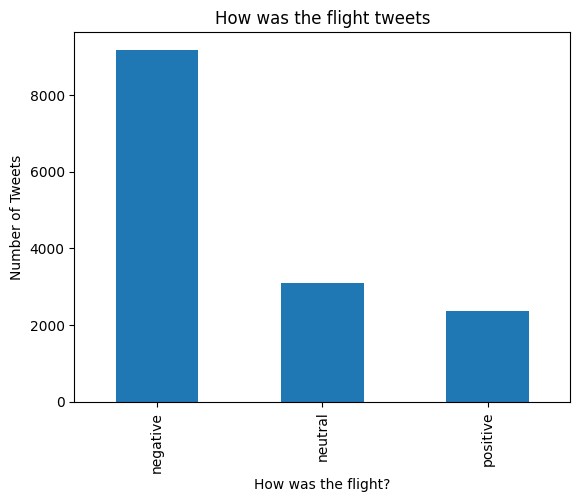

In [113]:
negativeReason = tweetsDf['airline_sentiment'].value_counts()
negativeReason.plot(kind='bar')

plt.title('How was the flight tweets')
plt.xlabel('How was the flight?')
plt.ylabel('Number of Tweets')
plt.show()

In [114]:
#positiveNneutral =  (tweetsDf[(tweetsDf['airline_sentiment'] == "postive") & (tweetsDf['airline_sentiment'] == "neutral")].index)
#tweetsDf.drop(positiveNneutral)

#airline_table = airline_table[airline_table['sentiment'] == 'negative']

tweetsDf=tweetsDf[tweetsDf['airline_sentiment']== 'negative']


<Figure size 2000x4000 with 0 Axes>

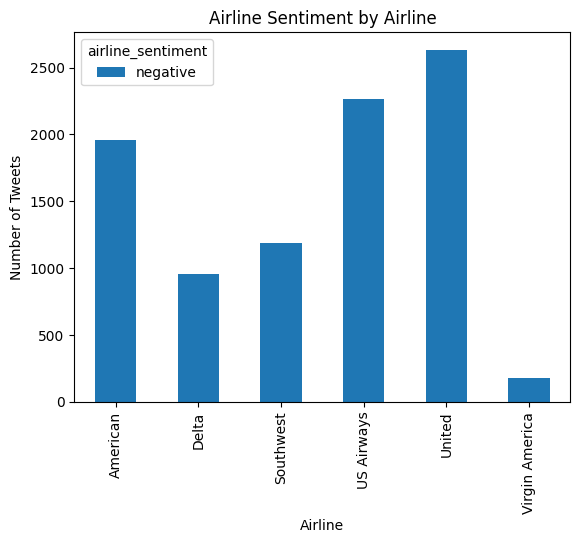

In [115]:
grouped = tweetsDf.groupby(['airline', 'airline_sentiment']).size().unstack()

fig = plt.figure(figsize = (20,40))
grouped.plot(kind='bar', stacked=True)
plt.title('Airline Sentiment by Airline')
plt.xlabel('Airline')
plt.ylabel('Number of Tweets')
plt.show()

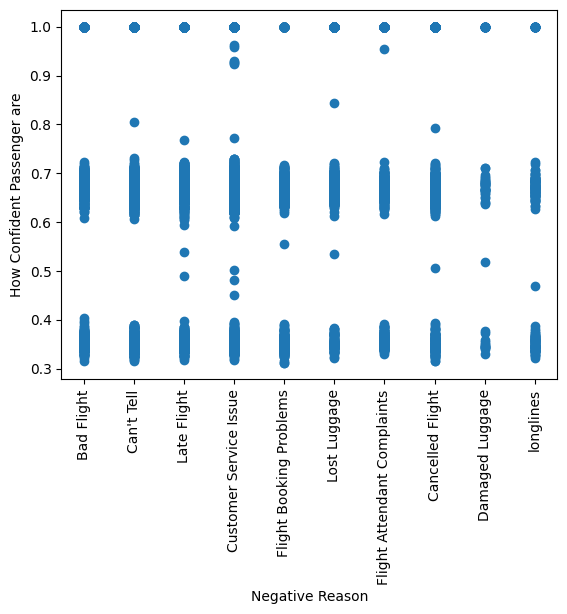

In [116]:
plt.scatter(tweetsDf['negativereason'], tweetsDf['negativereason_confidence'])
plt.xticks(rotation=90)
plt.xlabel('Negative Reason')
plt.ylabel('How Confident Passenger are')
plt.show()

# TESTING 
# This is code, I turned it into a text box only because once run, it effect the graphs above most likely because of calculating the average confidence

#Group your data by negative reason and calculate the average confidence:

grouped = tweetsDf.groupby('negativereason')['negativereason_confidence'].mean().reset_index()

#Sort the data by confidence in descending order:

 sorted_data = grouped.sort_values('negativereason_confidence', ascending=False)

#This will create a bar plot with the negative reasons on the x-axis and the confidence on the y-axis.
#The x-axis labels will be rotated 90 degrees to prevent overlapping labels.

plt.bar(sorted_data['negativereason'], sorted_data['negativereason_confidence'])
plt.xticks(rotation=90)
plt.xlabel('Negative Reason')
plt.ylabel('Confidence')
plt.show()



ChatGBT Code for HEATMAP PT1 

To make a graph showing each airline with each negative reason, you can use the seaborn library to create a heatmap. The heatmap will show the count of negative reasons for each airline and each negative reason.

First, we need to reshape the airline_table DataFrame so that each row represents an airline, a negative reason, and the count of occurrences. We can use the pivot_table() method to do this:



In [117]:
airline_negative_reasons = tweetsDf[tweetsDf['airline_sentiment'] == 'negative'].pivot_table(
    #index='airline',
    #columns='negativereason',
    index='negativereason',
    columns='airline',
    values='text',
    aggfunc='count'
)

ChatGBT Code for HEATMAP PT2

This code filters the DataFrame to keep only the rows where the 'sentiment' column is equal to 'negative', and then creates a pivot table with the 'airline' column as the index, the 'negativereason' column as the columns, and the 'text' column (which contains the review text) as the values. The aggfunc parameter is set to 'count' to count the number of occurrences.

This code sets the style of the plot to "darkgrid", sets the size of the figure to 12x8 inches, and creates a heatmap using sns.heatmap(). The data parameter specifies the DataFrame to use, and the annot, fmt, and cmap parameters specify the annotation, format, and color map for the heatmap, respectively.

We also set the title, x-label, and y-label using plt.title(), plt.xlabel(), and plt.ylabel(), respectively. Finally, we use plt.show() to display the plot.

This will create a heatmap showing each airline with the corresponding count of negative reasons. The color of each cell indicates the count of occurrences, with darker colors indicating higher counts. The x-axis shows the negative reasons, and the y-axis shows the airlines.

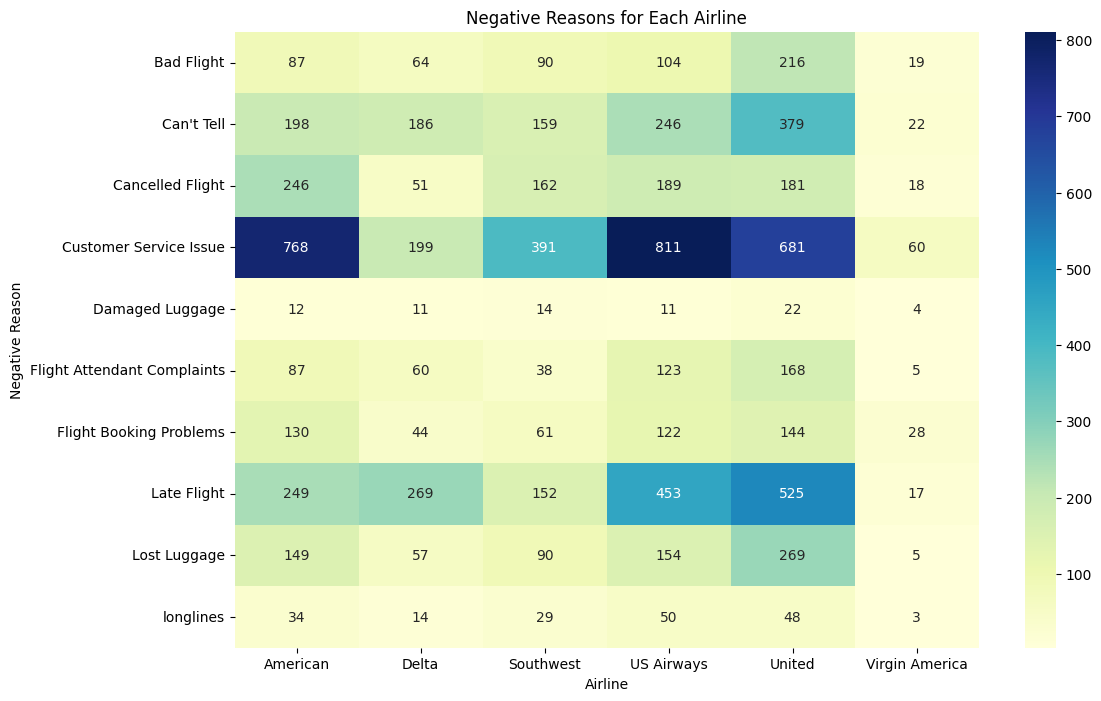

In [118]:
# Not sure if we should use this
plt.figure(figsize=(12, 8))
sns.heatmap(airline_negative_reasons, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Negative Reasons for Each Airline')
plt.xlabel('Airline')
plt.ylabel('Negative Reason')
plt.show()

Dropping Irrelevant data / aka Data cleansing

In [119]:
tweetsDf = tweetsDf.drop('airline_sentiment_gold', axis =1)
tweetsDf = tweetsDf.drop('name', axis =1)
tweetsDf = tweetsDf.drop('negativereason_gold', axis =1)
tweetsDf = tweetsDf.drop('retweet_count', axis =1)
tweetsDf = tweetsDf.drop('text', axis =1)
tweetsDf = tweetsDf.drop('tweet_coord', axis =1)
tweetsDf = tweetsDf.drop('tweet_created', axis =1)
tweetsDf = tweetsDf.drop('tweet_location', axis =1)
tweetsDf = tweetsDf.drop('user_timezone', axis =1)
tweetsDf = tweetsDf.drop('tweet_id', axis =1)

In [120]:
tweetsDf.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline
3,negative,1.0000,Bad Flight,0.7033,Virgin America
4,negative,1.0000,Can't Tell,1.0000,Virgin America
5,negative,1.0000,Can't Tell,0.6842,Virgin America
15,negative,0.6842,Late Flight,0.3684,Virgin America
17,negative,1.0000,Bad Flight,1.0000,Virgin America


In [121]:
bin = [0, 0.2, 0.4, 0.6, 0.9, 1]

tweetsDf['Airline_Conf_Bucket']= pd.cut(tweetsDf['airline_sentiment_confidence'], bin)

print(tweetsDf['Airline_Conf_Bucket'])

3        (0.9, 1.0]
4        (0.9, 1.0]
5        (0.9, 1.0]
15       (0.6, 0.9]
17       (0.9, 1.0]
            ...    
14631    (0.9, 1.0]
14633    (0.9, 1.0]
14634    (0.6, 0.9]
14636    (0.9, 1.0]
14638    (0.9, 1.0]
Name: Airline_Conf_Bucket, Length: 9178, dtype: category
Categories (5, interval[float64, right]): [(0.0, 0.2] < (0.2, 0.4] < (0.4, 0.6] < (0.6, 0.9] < (0.9, 1.0]]
